### Real-Time MRI and CWL correction
- should work on any matrix (i.e. numpy array)
- should be able to do immedeate operation
- should be an object that can remember all kinds of stuff
- successes in the past are a guarantee for successes in the future (a dodgy preposition)
- should be easily callable from 'outside', i.e. Matlab

- figure out whether the Wyrm Data structure, or the Pandas Dataframe, or just regular np.arrays would be most suited for MRI & CWL
-- my thought might gravitate towards the NP array -- in which case i'd need to figure out the code from wyrm DataFrame
-- I'd also need kind of a plan on what happens with the data -- both for CWL and the MRI part of the artifact correction

In [1]:
import numpy as np

In [18]:
class RtCorrectionMRI():
    def __init__(self, NTemplates=3, fs=5000, TR=2.0, hpfParams=[1.0, 2]):
        pass
    def correct(self, m):
        return m
    

In [11]:
mricorr=RtCorrectionMRI()

In [12]:
m=np.random.rand(2,2)

In [13]:
mricorr.correct(m)

array([[0.25253107, 0.47775588],
       [0.90135423, 0.70552452]])

- use the logic from Ringbuffer to keep track of things?
- keep track of a number of MRI artifacts in memory - use __init__
- use a HP filter of ?1Hz before MRI correction
- I need some MRI artifacts in memory on order to calculate Thresholds and Filter 
- I'd need the Replay stuff to test things out (the Leipzig Dataset of Subj 2)

In [14]:
fn='data/eeg/in-scan/trio2_eoec_in-scan_hpump-off.set'
import mne

In [11]:
r=mne.io.read_raw_eeglab(fn)

The following EEG sensors did not have a position specified in the selected montage: ['EOG', 'ECG', 'CW1', 'CW2', 'CW3', 'CW4', 'CW5', 'CW6']. Their position has been left untouched.
The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
Events like the following will be dropped entirely: ['eeo', 'eec', 'bec', 'mri', 'Sync On'], 8 in total
409/715 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
96 events will be dropped because they occur on the same time sample as another event. `mne.io.Raw` objects store events on an event channel, which cannot represent two events on the same sample. You can extract the original event structure using `mne.io.eeglab.read_events_eeglab`. Then, you can e.g. subset the extracted events for constructing epochs.
Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file


<ipython-input-11-c995a2e25c52>:1: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ['EOG', 'ECG', 'CW1', 'CW2', 'CW3', 'CW4', 'CW5', 'CW6']. Their position has been left untouched.
  r=mne.io.read_raw_eeglab(fn)
<ipython-input-11-c995a2e25c52>:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r=mne.io.read_raw_eeglab(fn)
<ipython-input-11-c995a2e25c52>:1: RuntimeWarning: Events like the following will be dropped entirely: ['eeo', 'eec', 'bec', 'mri', 'Sync On'], 8 in total
  r=mne.io.read_raw_eeglab(fn)
<ipython-input-11-c995a2e25c52>:1: RuntimeWarning: 409/715 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
  r=mne.io.read_raw_eeglab(fn)
<ipython-input-11-c995a2e25c52>:1: RuntimeWarning: 96 events will be dropped because they occur on the same time sample as another event. `mne.io

In [12]:
%matplotlib qt5

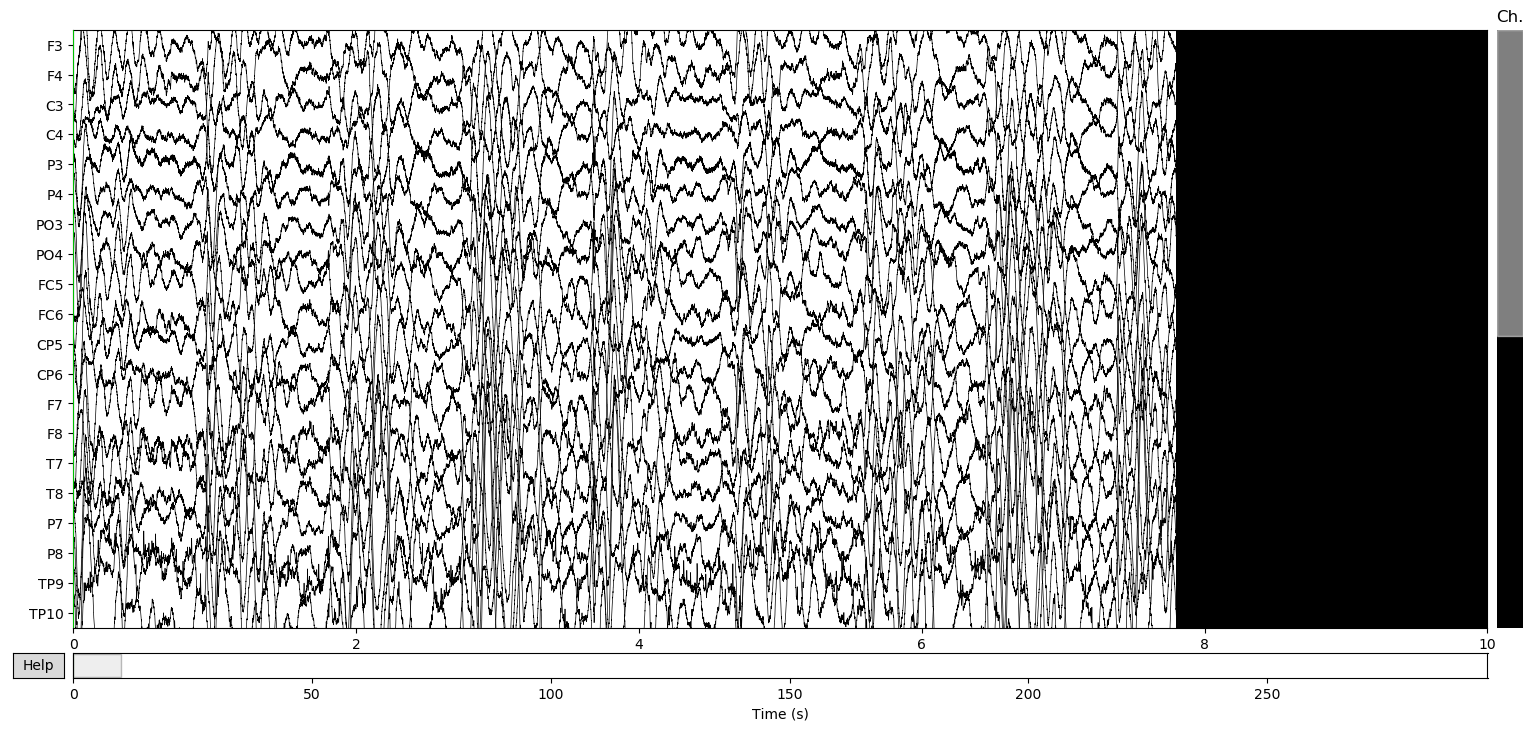

In [13]:
r.plot()